# Iterative Linear Quadratic Control

We consider the simulation of the control of a car on a track with nonlinear control algorithms.

We present (i) the modeling of the dynamics,
(ii) the modeling of the costs, (iii) different nonlinear control algorithms for open-loop control,
(iv) a model-predictive control algorithm to make the car drive along some tracks.

## Plan
1. [Dynamics](dynamics.ipynb)
    1. [Simple Model](dynamics.ipynb#simple_model)
    2. [Realistic Model](dynamics.ipynb#realistic_model)
2. [Costs](costs.ipynb)
    1. [Tracking Cost](costs.ipynb#tracking)
    2. [Contouring Cost](costs.ipynb#contouring)
3. [Finite Horizon NonLinear Control Algorithms](algos.ipynb)
    1. [Dynamic Programming](algos.ipynb#dyn_prog)
    2. [Gauss Newton](algos.ipynb#gauss_newton)
    3. [Differential Dynamic Programming](algos.ipynb#ddp)
    4. [Implementation](algos.ipynb#implementation)
4. [Model Predictive Control](mpc.ipynb)

## Demonstrations

### Autonomous Car Racing with Model Predictive Control
We start by presenting demonstrations of the car racing on a track. Here, we consider the dynamics and the algorithm fixed. Namely, the dynamics are defined by by using a bicycle model as presented by [[Liniger et al 2015]](#refs) to model a miniature car or [[Gerdts et al 2009]](#refs) to model a Volkswagen car (see notebook [Dynamics](dynamics.ipynb)). The algorithm is a model predictive control algorithm (see notebook [Model Predictive Control](mpc.ipynb)) with a window of 40 timesteps moving by one timestep at a time and where. Inside each window, we use a regularized variant of Differential Dynamic Programming (see notebook [Open Loop Control Algorithms](algos.ipynb)) to find an appropriate control of the car. We consider a finite horizon. 

We will play here on the parameters of the cost.
We use a *contouring cost* (see notebook [Costs](costs.ipynb)) that can be pictured as follows: we control not only the car with its non-linear dynamics but also a "greyhound" that follows exactly the track. The car must be as close as possible to the greyhound, while the greyhound must follow the track at some reference speed that we specify. The car and the greyhound work together: the greyhound is enforcing the car to follow the track at some reference speed, while the car slows down the greyhound when it has difficulties, e.g. when the car is taking a bend. 

The costs are defined by
- the choice of the **track** that the car must follow: 'simple' or 'complex',
- a reference speed **vref** for the "greyhound" to race the track, 
- a parameter **reg_cont** that enforces the car to follow the center of the track where the greyhound is,
- a parameter **reg_lag** that enforces the car to not stay behind the greyhound,
- a parameter **reg_speed** that enforces the greyhound to keep a reference speed vref, 

The movement of the car is also naturally constrained by the total number of time steps the car can do on the trajectory, denoted **horizon**. The larger the **horizon**, the longer the distance done by the car.

You can play in the code below to see some demonstrations of the car racing the simple or the complex tracks. Note that some combinations of the parameters lead to an infeasible objective. For example, one can force the car to follow the track at any speed.

env_cfg: {'env': 'real_car', 'track': 'complex', 'vref': 2.5, 'reg_cont': 1.0, 'reg_lag': 1.0, 'reg_speed': 1.0} 
optim_cfg: {'algo': 'ddp_linquad_reg', 'max_iter': 10, 'overlap': 39, 'window_size': 40, 'full_horizon': 800}


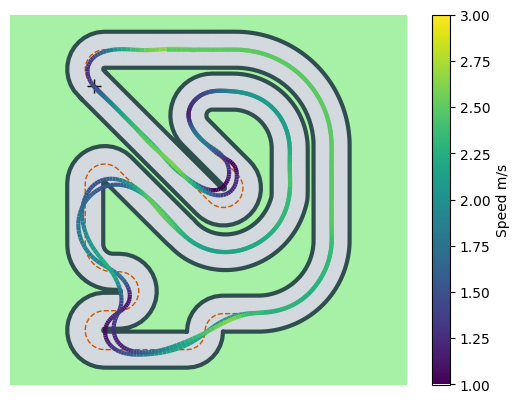

In [1]:
import time
import torch
from matplotlib import pyplot as plt

torch.set_default_dtype(torch.float64)

from model_predictive_control.mpc_pipeline import run_mpc
from envs.choose_env import make_env

# Environment configuration where you can play with the parameters of the cost
env_cfg =  dict(env='real_car', track='complex', vref=2.5, reg_cont=1., reg_lag=1., reg_speed=1.)
optim_cfg = dict(algo='ddp_linquad_reg', max_iter=10, overlap=39, window_size=40, full_horizon=800)

cmd_mpc = run_mpc(env_cfg, optim_cfg)

env = make_env(env_cfg)
traj, costs = env.forward(cmd_mpc)

# Plot the trajectory of the car on the track
fig, ax = env.plot_track()
env.plot_traj(traj, fig, ax)
plt.show()

# Display the movement of the track
env.visualize(cmd_mpc)


<a id='refs'></a>
## References
**Complexity Bounds of Iterative Linear Quadratic Optimization Algorithms for Discrete Time Nonlinear Control.**  
Vincent Roulet, Siddharta Srinivasa, Maryam Fazel, Zaid Harchaoui.  
*arxiv preprint arXiv:2204.02322*

**Iterative Linear Quadratic Optimization for Nonlinear Control: Differentiable Programming Algorithmic Templates.**  
Vincent Roulet, Siddharta Srinivasa, Maryam Fazel, Zaid Harchaoui.  
*arXiv preprint arXiv:2207.06362*

**Iterative Linearized Control: Stable Algorithms and Complexity Guarantees.**  
Vincent Roulet, Siddharta Srinivasa, Dmitry Drusvyatskiy, Zaid Harchaoui.  
*Proceedings of the 36th International Conference on Machine Learning (ICML 2019).*  

**On the Convergence to Stationary Points of the Iterative Linear Exponential Quadratic Gaussian Algorithm.**  
Vincent Roulet, Maryam Fazel, Siddhartha Srinivasa, Zaid Harchaoui.  
*Proceedings of the 2020 American Control Conference (ACC 2020).*  

**Superquantiles at Work : Machine Learning Applications and Efficient (Sub)gradient Computation.**  
Y. Laguel, K. Pillutla, J. Malick, Z. Harchaoui.  
*Submitted to Set-Valued and Variational Analysis.*  

**Optimization‐Based Autonomous Racing of 1: 43 Scale RC Cars.**  
Alexander Liniger, Alexander Domahidi, and Manfred Morari.  
*Optimal Control Applications and Methods, 2015.*  

**Generating Locally Optimal Trajectories for an Automatically Driven Car.**  
Matthias Gerdts, Simon Karrenberg, Bernhard Müller-Beßler and Gregor Stock.  
*Optimization and Engineering, 2009.*  

**Nonlinear Model Predictive Control.**  
Lars Grüne and Jürgen Pannek.  
*Springer Publishing Company, Incorporated, 2013.*  

**Feedback in Imitation Learning: The Three Regimes of Covariate Shift.**  
Jonathan Spencer, Sanjiban Choudhury, Arun Venkatraman, Brian Ziebart, and J Andrew Bagnell.  
*arXiv preprint arXiv:2102.02872, 2021.*  

**An Algorithmic Perspective on Imitation Learning.**  
Takayuki Osa, Joni Pajarinen, Gerhard Neumann, J. Andrew Bagnell, Pieter Abbeel and Jan Peters.  
*Foundations and Trends® in Robotics, 2018.*  